# Word Clouds for Khuyen

In [1]:
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

In [2]:
PATH_DATA = "../data/raw/caregivers_set13Jul2020.csv"
PATH_DICT_CHILD = "../dictionaries/child_phrase_dictionary.txt"
PATH_DICT_SPOUSE = "../dictionaries/spouse_phrase_dictionary.txt"

COLORS_DFCI = ["#f09322", "#ffa300", "#444444", "#3abfe9", "#106696"]

In [3]:
df = pd.read_csv(PATH_DATA)

In [4]:
with open(PATH_DICT_CHILD) as file:
    keywords_child = file.read()
    keywords_child = keywords_child.split("\n")
    
with open(PATH_DICT_SPOUSE) as file:
    keywords_spouse = file.read()
    keywords_spouse = keywords_spouse.split("\n")

In [5]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    return text

In [6]:
cv = CountVectorizer(
    stop_words="english",
    preprocessor=preprocess_text
)
cv_fit = cv.fit_transform(df["TEXT"])

In [7]:
bow = pd.DataFrame(cv_fit.toarray(), columns = cv.get_feature_names())
bow = bow.sum()

In [8]:
bow.sort_values(ascending=False)

ml               149938
mg               129540
pt               109565
dl                82776
pm                80176
                  ...  
seizured              1
clo                   1
clnical               1
seizurex              1
intraduodenal         1
Length: 40960, dtype: int64

In [9]:
bow[bow.index.str.len() > 2].sort_values(ascending=False)

patient        69576
plan           66545
assessment     59120
respiratory    53735
icu            50360
               ...  
edemia             1
restiction         1
edematious         1
restircted         1
reunited           1
Length: 40447, dtype: int64

In [10]:
bow[bow.index.isin(keywords_child)].sort_values(ascending=False)

daughter         4656
son              3290
children          740
teens             428
daughters         396
sons              217
child             194
granddaughter     123
grandson           91
grandchildren      89
kids               25
teen               15
teenager           14
boy                13
girl               12
juvenile            7
grandchild          5
grandkids           4
boys                4
girls               3
offspring           3
stepdaughter        3
adolescent          3
adolescents         2
daugh               1
dtype: int64

In [11]:
cmap = lambda colors: matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

def word_cloud(frequencies, colors=COLORS_DFCI):
     return WordCloud(
        font_path="assets/Poppins-Bold.ttf",
        width=600,
        height=400,
        min_font_size=14,
        max_font_size=150,
        background_color=None,
        random_state=0,
        colormap=cmap(colors),
        mode="RGBA"
    ).generate_from_frequencies(frequencies.to_dict())


def show_word_cloud(frequencies):
    wc = word_cloud(frequencies)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    
    return fig

## Overall

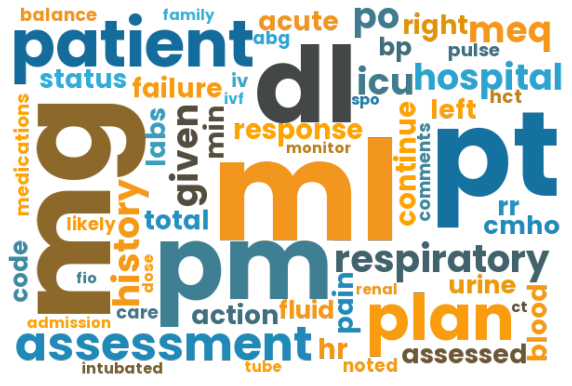

In [12]:
show_word_cloud(bow).savefig("wordcloud_overall.png")

## Words with length > 2

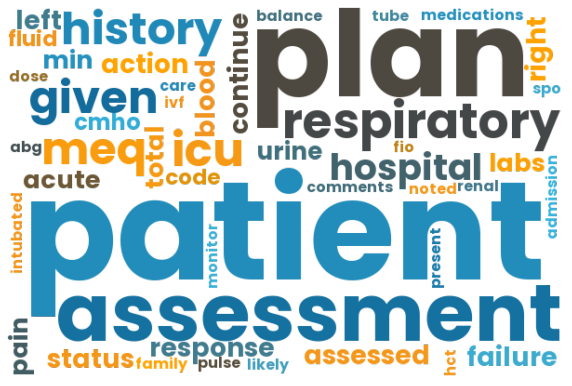

In [13]:
show_word_cloud(
    bow[bow.index.str.len() > 2]
).savefig("wordcloud_words_longer_than_2.png")

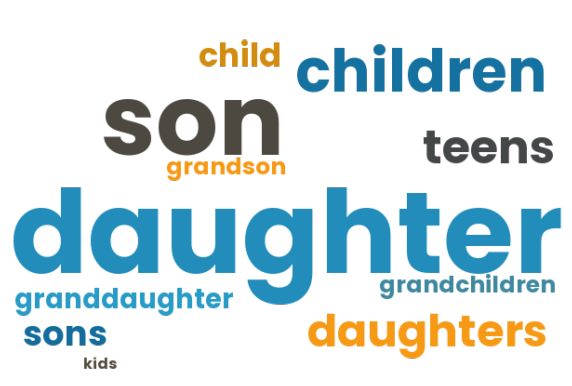

In [14]:
show_word_cloud(
    bow[bow.index.isin(keywords_child)]
).savefig("wordcloud_child_keywords.png")

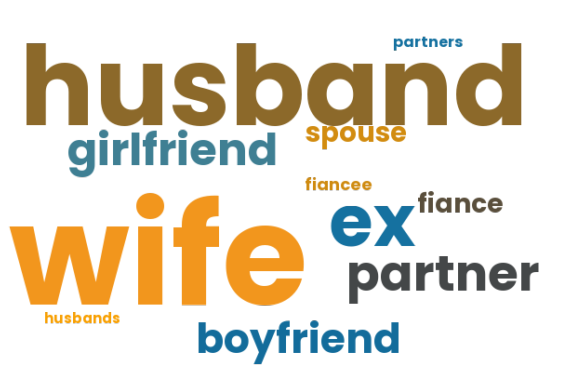

In [15]:
show_word_cloud(
    bow[bow.index.isin(keywords_spouse)]
).savefig("wordcloud_spouse_keywords.png")

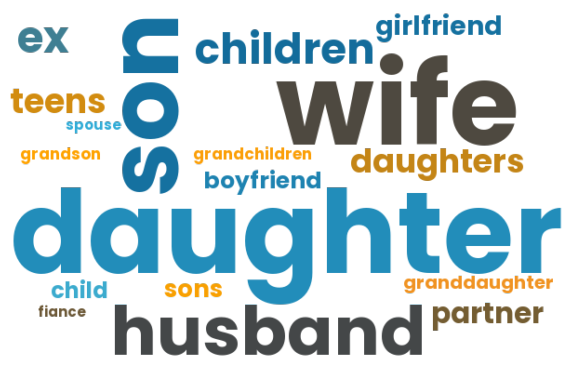

In [16]:
show_word_cloud(
    bow[
        bow.index.isin(keywords_spouse) |\
        bow.index.isin(keywords_child)
    ]
).savefig("wordcloud_all_keywords.png")